# GLUT1 Analysis - Main Notebook

### 1. Preparing the data
Folder structure:
+ *Main Folder*
    + *Rawdata*
    + *Templates*
    + Animal_Scan_IDs.xlsx
    
    
- In the *Rawdata* folder each animal has a subfolder containing all the raw scans (simply the folders given by ParaVision)
- *Templates* folder contains templates for coregistration for each MR sequence (just pick one of the animals in the group). See examples.
- *Excel* file contains all animal ID's and their corresponding scan numbers for each modality (see example file).

In [1]:
import os
import subprocess
import numpy as np
import pandas as pd
import MRIhelperfunctions as h
import MRIhelperfunctions
from MRIhelperfunctions import Settings
from imp import importlib
import shutil
import papermill as pm
import glob
import matplotlib.pyplot as plt


In [294]:
importlib.reload(h)
import MRIhelperfunctions as h
from MRIhelperfunctions import Settings

## Folder settings
Adjust these settings once for each study (namely location of rawdata folder and name of excel info file). These are constant across all animals and modalities

In [2]:
raw_folder = '/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata'   #<-- change this
main_folder = os.path.dirname(raw_folder)  # automatically uses one folder above rawdata folder as "main folder".

excel_filename = 'Animal_Scan_IDs.xlsx'  #<-- change this. Must be placed inside main folder


analysis_folder = os.path.join(main_folder,'Analysis')
notebookfolder = '/BigHDD/MR_DATA/GithubRepositories/CalciumfMRI/fMRI_notebooks'

folders = {}
folders.update({'main':main_folder, 'raw':raw_folder, 'analysis':analysis_folder, 'notebooks':notebookfolder, 'excel':excel_filename})
# folders = Settings(main = main_folder, raw = raw_folder, analysis = analysis_folder, notebooks = notebookfolder, excel = excel_filename)

# stores dataframes to plot for later
plots={}

# Check in output below if Excel file is correctly recognized
info = h.getinfo(folders)
info

,glut1_male1,glut1_male2,glut1_f10wks1,glut1_f10wks2,glut1_f10wks3,glut1_f10wks4,glut1_f10wks5,glut1_f10wks6,glut1_f8wks1,glut1_f8wks2,glut1_f8wks3,glut1_f8wks4,glut1_f8wks5,glut1_f8wks6,glut1_f8wks7,glut1_f6wks2,glut1_f6wks1
scan,,,,,,,,,,,,,,,,,
genotype,1,1,1,2,1,2,2,1,1,1,2,2,2,2,1,1,1
Gd DCE,6,8,6,5,5,8,5,5,7,5,6,6,8,8,6,5,5
Angio pre,8,9,7,6,6,9,6,6,8,6,9,8,9,9,8,6,6
Angio post,12,12,11,9,9,13,10,11,12,11,12,12,16,13,12,9,10
Endorem DCE,11,11,10,8,8,12,9,10,10,10,11,11,15,12,11,8,9
Diamox,15,14,13,11,13,15,12,13,15,13,16,17,20,16,14,11,13
folder,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018060...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018060...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018060...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018060...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018060...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018060...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018060...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018060...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...


In [121]:
# use code below to locate folders of individual animals:
info.loc['folder','glut1_male1']

'/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/20180604_101508_Glut1_2_2'

## Main loop

Runs the selected analyses (modules) for each individual animal.

- To turn a certain analysis on or off: comment/uncomment the line with *#*
- to run the loop only on a single/subset of animals: index *info.columns*, e.g. info.columns[1:2] would run only the 2nd animal
- If the analysis crashes after a couple of animals, use the option 'overwrite = False' to run loop again only on the animals that were not yet processed.


In [ ]:
# for animal in ['glut1_f10wks2']:  # to run only one or subset of animals, enter here and comment out line below.
for animal in info.columns:   
    print('animal: ',animal)
    folders['animal']=info.loc['folder',animal]
    inputs = dict(folders=folders, animal=animal, info=info.to_json())
    
    
#     h.run_module(folders, 'Angiography', inputs)  # ~2-3 min

#     h.run_module(folders, 'Leakage', inputs, overwrite = True) # ~10-15 min

    h.run_module(folders, 'BolusTracking', inputs) # ~8 min

#     h.run_module(folders, 'Diamox', inputs, overwrite = False) # ~20-50 min
    h.pushover(f"Analysis for {animal} finished")

print('All complete!')
h.pushover(f"All analyses complete")


animal:  glut1_male1
running BolusTracking analysis...


Input Notebook:  /BigHDD/MR_DATA/GithubRepositories/CalciumfMRI/fMRI_notebooks/BolusTracking.ipynb
Output Notebook: /home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/20180604_101508_Glut1_2_2/BolusTracking_output.ipynb
 84%|████████▍ | 21/25 [01:00<00:11,  2.86s/it]

## Collecting outputs for group analysis

copies only relevant files of each animal in group folder

In [131]:
folders['group'] = h.folder_check_create(folders['main'], 'Groupstats')


for animal in info.columns:   
    folders['animal']=info.loc['folder',animal]

#     info, folders = h.copy_notebook_outputs(folders, animal, 'Angiography', info)

#     info, folders = h.copy_notebook_outputs(folders, animal, 'BolusTracking', info)
    
    info, folders = h.copy_notebook_outputs(folders, animal, 'Diamox', info)
    
#     info, folders = h.copy_notebook_outputs(folders, animal, 'Leakage', info)
    
    
    # copying some underlay files to the folders
    template_file = os.path.join(folders['main'], 'Templates', 'BolusTracking.nii')    
    output = os.path.join(folders['group'], 'BolusTracking', 'Template.nii')
    shutil.copy(template_file, output)
    output = os.path.join(folders['group'], 'Diamox', 'Template.nii') # same scan settings as BolusTracking
    shutil.copy(template_file, output)
    
info

,glut1_male1,glut1_male2,glut1_f10wks1,glut1_f10wks2,glut1_f10wks3,glut1_f10wks4,glut1_f10wks5,glut1_f10wks6,glut1_f8wks1,glut1_f8wks2,glut1_f8wks3,glut1_f8wks4,glut1_f8wks5,glut1_f8wks6,glut1_f8wks7,glut1_f6wks2,glut1_f6wks1
scan,,,,,,,,,,,,,,,,,
genotype,1,1,1,2,1,2,2,1,1,1,2,2,2,2,1,1,1
Gd DCE,6,8,6,5,5,8,5,5,7,5,6,6,8,8,6,5,5
Angio pre,8,9,7,6,6,9,6,6,8,6,9,8,9,9,8,6,6
Angio post,12,12,11,9,9,13,10,11,12,11,12,12,16,13,12,9,10
Endorem DCE,11,11,10,8,8,12,9,10,10,10,11,11,15,12,11,8,9
Diamox,15,14,13,11,13,15,12,13,15,13,16,17,20,16,14,11,13
folder,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018060...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018060...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018060...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018060...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018060...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018060...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018060...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018060...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...,/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/2018061...
diamox_slope,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...
diamox_ttp,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...,/home/aic/BigHDD/MR_DATA/GLUT1/Analysis/glut1_...


In [203]:
# to display location of individual files (first column name, then animal name)
info.loc['folder','glut1_f10wks2']

'/home/aic/BigHDD/MR_DATA/GLUT1/Rawdata/20180607_113110_Glut1_2_5'

## Create average & statistical maps

### Leakage

In [19]:
map_names = ['Leakage_max']   # prefixes of the output files

for map_type in map_names:
    group1, group2 = h.select_for_group_average(folders['group_Leakage'],
                             info, map_type,
                             exclude='male',  #<-- excludes animals that contain this string in animal name
                             row = 'genotype')
    h.ttest_2groups(folders['group_Leakage'], map_type, group1, group2, blur=0.0)

created /home/aic/BigHDD/MR_DATA/GLUT1/Groupstats/Leakage/meanLeakage_max_Ttest.nii


### Bolus Tracking

In [140]:
# extracting ROI time series, if ROI file above exists.
def name_rois(group1, group2, roipath):
    if os.path.exists(roipath):
        for filepath in group1:
            filename = os.path.splitext(os.path.basename(filepath))[0] #remove .nii extension
            roiname = f"{filename}.group1"
            # e.g. diamox_max_glut1_f10wks5.group1
            h.extract_roi(filepath, roipath, name=roiname)
        for filepath in group2:
            filename = os.path.splitext(os.path.basename(filepath))[0]
            roiname = f"{filename}.group2"
            h.extract_roi(filepath, roipath, name=roiname)

In [229]:
plots={}

In [231]:
map_names = ['CBF_map', 'CBV_bolus_map', 'MTT_map', 'CBV_steadystate_map']   # prefixes of the output files

for map_type in map_names:
    group1, group2 = h.select_for_group_average(folders['group_BolusTracking'],
                             info, map_type,
                             exclude='male',  #<-- excludes animals that contain this string in animal name
                             row = 'genotype')
    h.ttest_2groups(folders['group_BolusTracking'], map_type, group1, group2, blur=0.4)
    
    name_rois(group1, group2, folders['bolustracking_roi'])

# to get the spreadsheet with all ROI averages
df, plots['bolustracking'] = h.create_clean_csv(folders['group_BolusTracking'])

created /home/aic/BigHDD/MR_DATA/GLUT1/Groupstats/BolusTracking/meanCBF_map_Ttest.nii
created /home/aic/BigHDD/MR_DATA/GLUT1/Groupstats/BolusTracking/meanCBV_bolus_map_Ttest.nii
created /home/aic/BigHDD/MR_DATA/GLUT1/Groupstats/BolusTracking/meanMTT_map_Ttest.nii
created /home/aic/BigHDD/MR_DATA/GLUT1/Groupstats/BolusTracking/meanCBV_steadystate_map_Ttest.nii
created /home/aic/BigHDD/MR_DATA/GLUT1/Groupstats/BolusTracking/roi_all.csv


### Diamox

In [298]:
map_names = ['diamox_ttp', 'diamox_slope', 'diamox_max']
to_exclude = ['male','f8wks6']


for map_type in map_names:
    group1, group2 = h.select_for_group_average(folders['group_Diamox'],
                             info, map_type,
                             exclude=to_exclude,  #<-- excludes animals that contain this string in animal name
                             row = 'genotype')
    h.ttest_2groups(folders['group_Diamox'], map_type, group1, group2, blur=0.4)
    
    name_rois(group1, group2, folders['bolustracking_roi']) # same ROI, because its EPI with same geometry. 
    
df, plots['diamox']  = h.create_clean_csv(folders['group_Diamox'],'diamox')

skipping diamox_ttp_glut1_f8wks6.nii
skipping diamox_ttp_glut1_male2.nii
created /home/aic/BigHDD/MR_DATA/GLUT1/Groupstats/Diamox/meandiamox_ttp_Ttest.nii
skipping diamox_slope_glut1_f8wks6.nii
skipping diamox_slope_glut1_male2.nii
created /home/aic/BigHDD/MR_DATA/GLUT1/Groupstats/Diamox/meandiamox_slope_Ttest.nii
skipping diamox_max_glut1_male2.nii
skipping diamox_max_glut1_f8wks6.nii
created /home/aic/BigHDD/MR_DATA/GLUT1/Groupstats/Diamox/meandiamox_max_Ttest.nii
created /home/aic/BigHDD/MR_DATA/GLUT1/Groupstats/Diamox/diamox.csv


## Plotting

/home/aic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/aic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


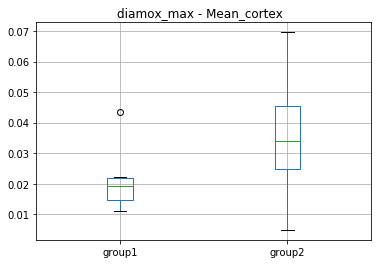

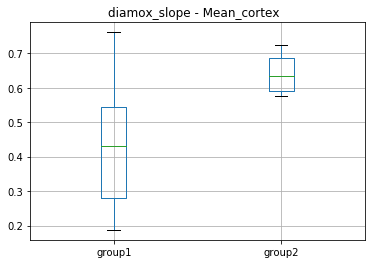

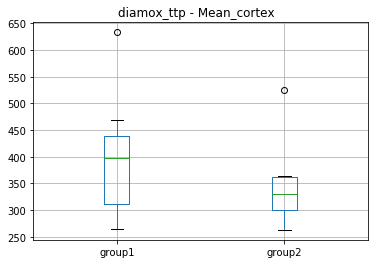

In [299]:
# plotframe = pd.read_csv(plots['bolustracking'])
plotframe = pd.read_csv(plots['diamox'])


def MR_boxplots(plotframe):
    individualFrames={}
    roiname = plotframe.columns[0]
    for measurement in plotframe['measurement'].unique():
        individualFrames[measurement] = plotframe.loc[plotframe['measurement'] == measurement]
        individualFrames[measurement]['group1'] = individualFrames[measurement].loc[frame['group'] == 1, roiname]
        individualFrames[measurement]['group2'] = individualFrames[measurement].loc[frame['group'] == 2, roiname]

        plt.figure()
        boxplot = individualFrames[measurement].boxplot(column=['group1', 'group2'])
        plt.title(measurement + ' - ' + roiname)
        
MR_boxplots(plotframe)